# Plotteskript for data fra analog motorlab

In [80]:
import pandas as pd
import glob
import numpy as np

def yield_data_arrays():
    '''Funksjon som leser inn data fra CSV-filer og returnerer måletid, måleverdier og referansemålinger.
       (measurement_t, measurement_s, ref_measurement_t, ref_measurement_s, measurement_number) '''

    CSV_folder = "CSV_MOTORLAB"
    folders = glob.glob(f"{CSV_folder}/*")

    for folder in folders:
        CSV_files = glob.glob(f"{folder}/*")

        mesurement = pd.read_csv(CSV_files[0])
        ref_mesurement = pd.read_csv(CSV_files[1])

        measurement_t = mesurement.iloc[:,0].to_numpy()
        measurement_s = mesurement.iloc[:,1].to_numpy()
        ref_measurement_t = ref_mesurement.iloc[:,0].to_numpy()
        ref_measurement_s = ref_mesurement.iloc[:,1].to_numpy()

        #measurement_t = measurement_t - np.min(measurement_t) # Setter starten på tidsaksen til 0
        #ref_measurement_t = ref_measurement_t - np.min(ref_measurement_t) # Setter starten på tidsaksen til 0
        # time = time*1000 # Setter tidsakse til ms

        # Splitter streng på '/' og fjerner .csv for å få ut målenummer
        measurement_number = CSV_files[0].split('/')
        measurement_number = measurement_number[-1].split('.')[0][3:]

        yield measurement_t, measurement_s, ref_measurement_t, ref_measurement_s, measurement_number


In [81]:
import scipy.optimize


def fit_sin(tt, yy, measurement_number):
    '''Tilpasser en sinuskurve til tidsserien som gis som parameter "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    Fyy = abs(np.fft.fft(yy))
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # Antar konstant tidssteg

    # Setter gjettefrekvens manuelt for måling 14, pga. algoritmen feilet av ukjent årsak. 
    if measurement_number == "14":
        guess_freq = 6.3
    else:
        guess_freq = abs(ff[np.argmax(Fyy[1:])+1])    # excluding the zero frequency "peak", which is related to offset - Fra nettet, her stopper min kunskap....
    
    #print(f"guess_freq: {guess_freq}")  # Debugging
        
    guess_amp = np.std(yy) * (2.**0.5)
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  
        return A * np.sin(w*t + p) + c

    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess,popt,pcov)}


Amplitude=1.2352697976202838, Vinkelfrekvens=28.27421440589658, Frekvens=4.499980984738517, Fase=-9.866153246144071, offset=3.057984928149445, Maks. Cov.=6.91254889248837e-06
Amplitude=-1.2595225361448827, Vinkelfrekvens=28.273325208888924, Frekvens=4.499839464639367, Fase=-5.826257828825115, offset=3.004869313126725, Maks. Cov.=5.228022423399345e-07


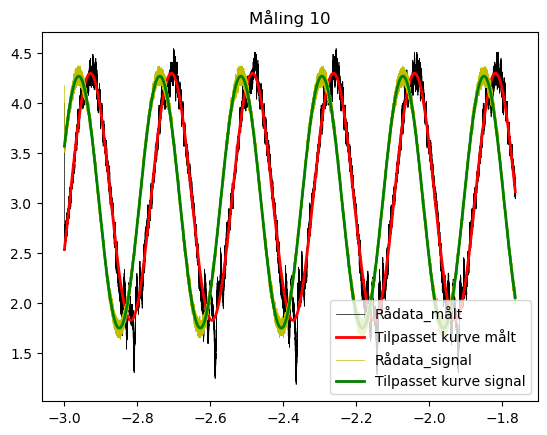

Amplitude=1.5983143983933823, Vinkelfrekvens=50.26117823207498, Frekvens=7.999314961257503, Fase=-0.14731972913373292, offset=3.0484790700617355, Maks. Cov.=4.430012512871387e-05
Amplitude=1.2600532737049313, Vinkelfrekvens=50.26123230368995, Frekvens=7.999323567022306, Fase=0.8310486306777928, offset=3.0069251632897007, Maks. Cov.=8.46184063803801e-07


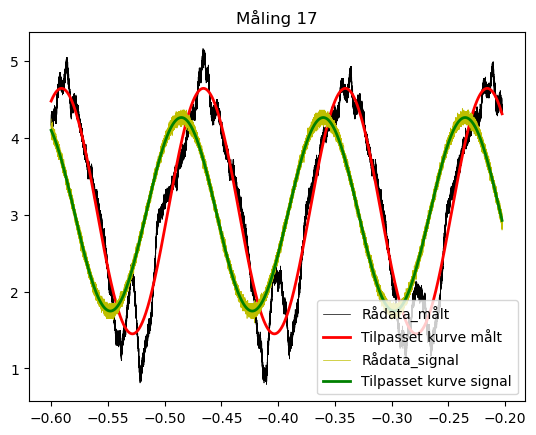

Amplitude=1.2592543581414117, Vinkelfrekvens=62.8311854171657, Frekvens=9.999893739465332, Fase=2.3302136115766605, offset=3.0083549606953155, Maks. Cov.=1.956145189350769e-07
Amplitude=2.2063591123514814, Vinkelfrekvens=62.82781410311993, Frekvens=9.999357178170232, Fase=-0.048636689152530256, offset=3.045909931912419, Maks. Cov.=5.53571651478957e-06


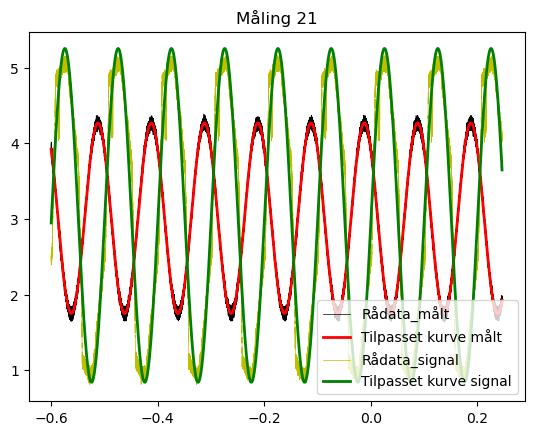

Amplitude=1.2587171916989432, Vinkelfrekvens=56.54902857558169, Frekvens=9.000057424848666, Fase=-1.13370699039541, offset=3.0032006262310484, Maks. Cov.=1.5997082615823963e-07
Amplitude=1.7922073168332984, Vinkelfrekvens=56.54552637131998, Frekvens=8.999500031728699, Fase=-2.115157308440861, offset=3.056169697851278, Maks. Cov.=3.579676967308369e-06


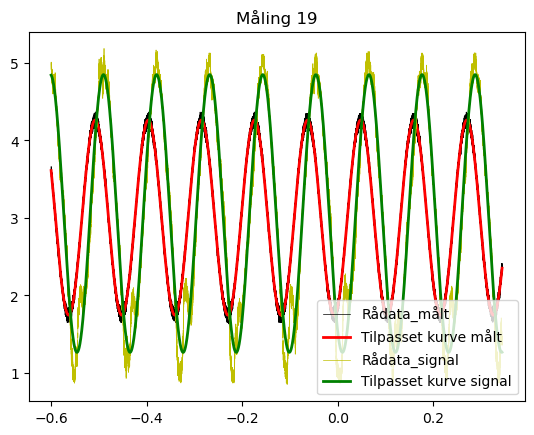

Amplitude=1.2586736858118968, Vinkelfrekvens=53.40610157299359, Frekvens=8.499845056609777, Fase=-3.3675363569851426, offset=3.0004535299090005, Maks. Cov.=4.96776325565767e-07
Amplitude=-1.694701808675974, Vinkelfrekvens=53.4049592673489, Frekvens=8.499663253019904, Fase=-1.1972032922057863, offset=3.0533595585253734, Maks. Cov.=3.8617689973752916e-05


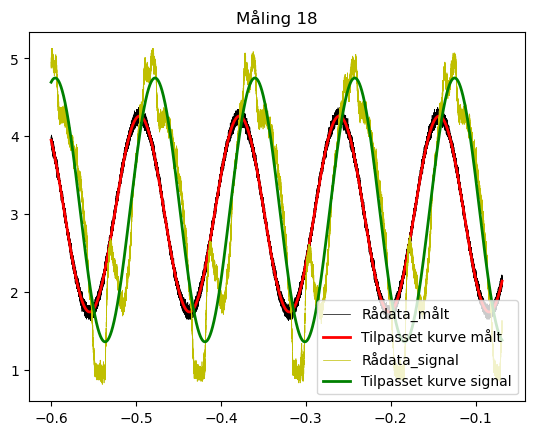

Amplitude=-1.2586958904822334, Vinkelfrekvens=59.69152172468246, Frekvens=9.500200743160471, Fase=-0.33996590612485267, offset=3.002963186395436, Maks. Cov.=1.9890343312478656e-07
Amplitude=2.218391074511954, Vinkelfrekvens=59.708885227024155, Frekvens=9.50296423038754, Fase=0.6052840935748054, offset=3.0635119502858212, Maks. Cov.=5.139336333806049e-06


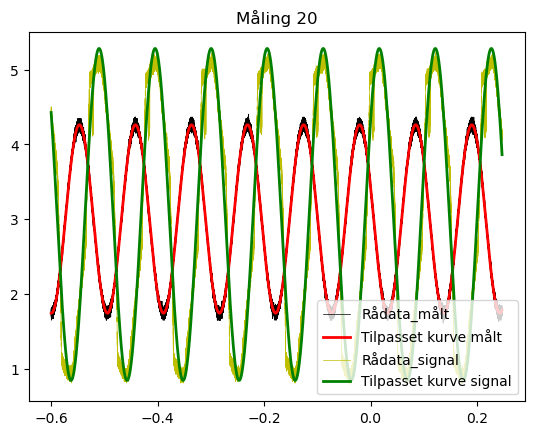

Amplitude=1.5326714660672358, Vinkelfrekvens=47.112940227767574, Frekvens=7.498257320842215, Fase=0.2659458192237472, offset=3.058423287823118, Maks. Cov.=1.755224913946063e-06
Amplitude=1.259187110014633, Vinkelfrekvens=47.123638213760266, Frekvens=7.49995995819408, Fase=1.2428337739006403, offset=3.0056025343899457, Maks. Cov.=9.897223713688587e-08


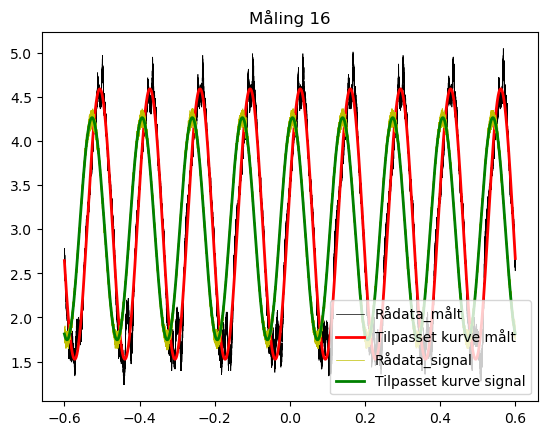

Amplitude=1.2670845198299985, Vinkelfrekvens=31.420704716454285, Frekvens=5.000760471054529, Fase=-3.901932747163145, offset=3.059213672163702, Maks. Cov.=6.848783851758454e-06
Amplitude=1.2595883111150852, Vinkelfrekvens=31.415795232616105, Frekvens=4.999979102433653, Fase=-2.9832281292238187, offset=3.005092175722826, Maks. Cov.=4.437032098434421e-07


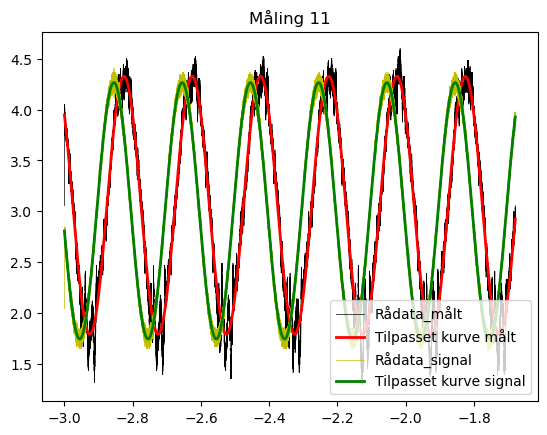

Amplitude=-1.2587637492353394, Vinkelfrekvens=9.424845685824852, Frekvens=1.5000107787773498, Fase=0.7482738518488333, offset=3.0070146832934923, Maks. Cov.=3.487392624273018e-08
Amplitude=-1.2301649212927845, Vinkelfrekvens=9.426016846754083, Frekvens=1.5001971748283929, Fase=0.3068787545440277, offset=3.0588651895173498, Maks. Cov.=1.3976554066164987e-07


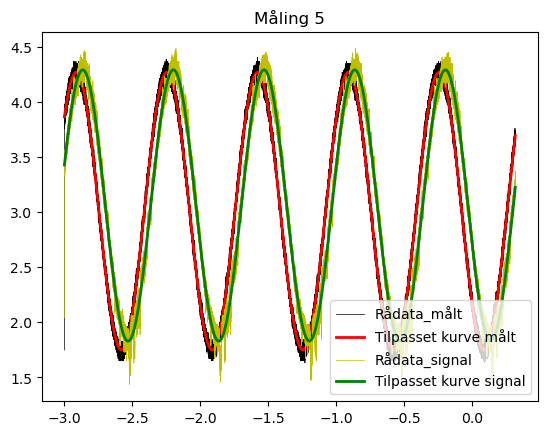

Amplitude=-1.2595314938340443, Vinkelfrekvens=5.026754875247468, Frekvens=0.8000328861069183, Fase=-1.1000638647211556, offset=3.007523659411709, Maks. Cov.=1.877103149397311e-08
Amplitude=1.2542710730694018, Vinkelfrekvens=5.0258154514279925, Frekvens=0.7998833721623905, Fase=1.7907396495040027, offset=3.053988220323852, Maks. Cov.=4.908552971617565e-08


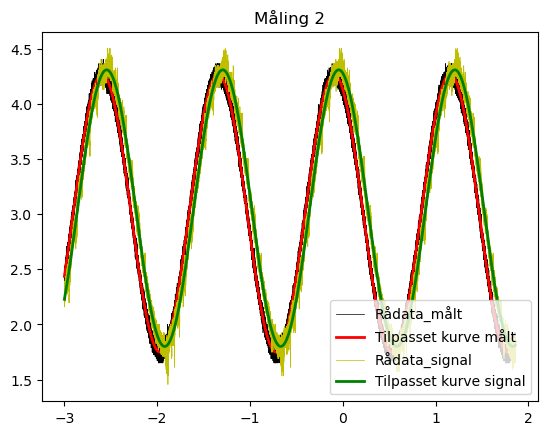

Amplitude=1.2572741432757752, Vinkelfrekvens=6.282627807066296, Frekvens=0.9999112711011956, Fase=-0.3773733519678707, offset=3.0088207750188234, Maks. Cov.=1.9294453377887e-08
Amplitude=1.242824334502307, Vinkelfrekvens=6.2826593030250955, Frekvens=0.9999162838387259, Fase=-0.6857663973045024, offset=3.069214353241586, Maks. Cov.=5.1930275242497335e-08


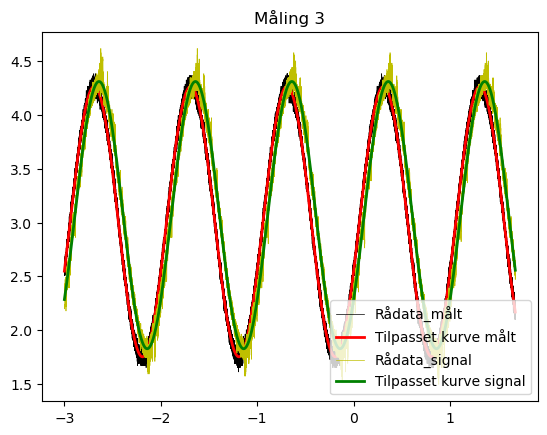

Amplitude=-1.2635376163139964, Vinkelfrekvens=6.283071475994661, Frekvens=0.9999818832042412, Fase=0.8057863453777551, offset=3.0071308128061105, Maks. Cov.=1.9407924858763483e-08
Amplitude=-1.2490739776621447, Vinkelfrekvens=6.283973952413618, Frekvens=1.000125516787342, Fase=0.4986762566462057, offset=3.0462657150394095, Maks. Cov.=4.708525288704885e-08


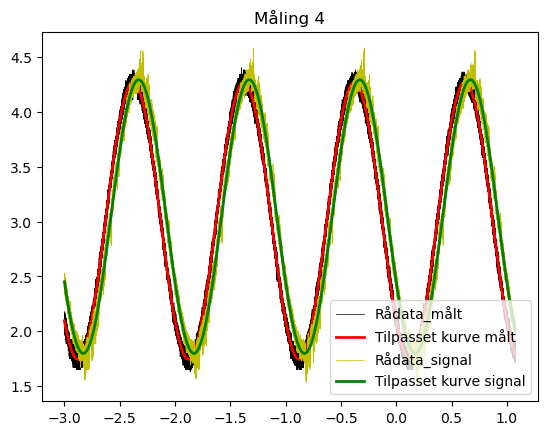

Amplitude=1.403361489939642, Vinkelfrekvens=40.842739100624634, Frekvens=6.500323817277042, Fase=0.9567822966044828, offset=3.0505350502512445, Maks. Cov.=3.0962081271945224e-06
Amplitude=1.259460971204148, Vinkelfrekvens=40.84144364220872, Frekvens=6.50011763866658, Fase=1.9505752859346497, offset=3.0067179333954286, Maks. Cov.=1.9757064717095526e-07


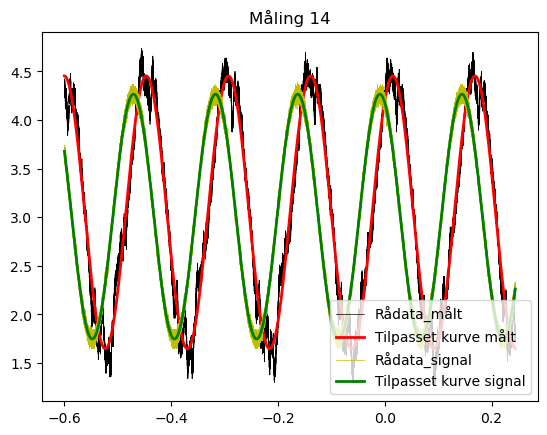

Amplitude=1.3565977936961704, Vinkelfrekvens=37.69894432369866, Frekvens=5.999973338462792, Fase=2.66468830413787, offset=3.065019120651356, Maks. Cov.=3.098692092301078e-05
Amplitude=1.2589990131679476, Vinkelfrekvens=37.699195466798884, Frekvens=6.000013309128615, Fase=3.643527140896422, offset=3.0050823488816136, Maks. Cov.=9.197175203247546e-07


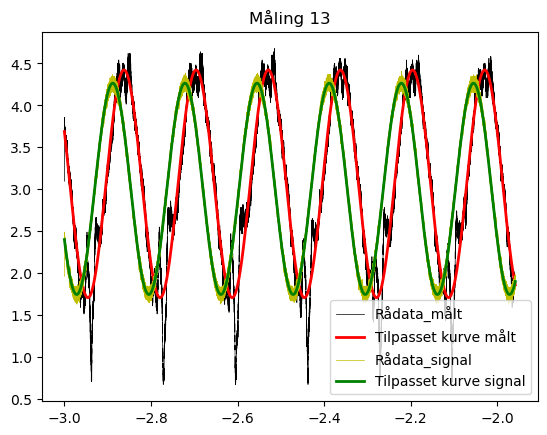

Amplitude=1.302563628930368, Vinkelfrekvens=34.54833718907841, Frekvens=5.498538639247386, Fase=-4.365719179778968, offset=3.0682233818020306, Maks. Cov.=1.0672722535053491e-05
Amplitude=1.2578924116845902, Vinkelfrekvens=34.555739899533805, Frekvens=5.49971681720864, Fase=-3.385415892956187, offset=3.002900643683616, Maks. Cov.=8.229906281865598e-07


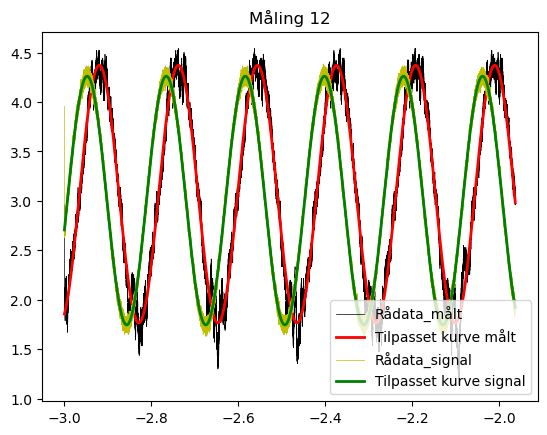

Amplitude=1.4695917366411484, Vinkelfrekvens=44.00528581344717, Frekvens=7.003658759381774, Fase=1.7809153047720863, offset=3.0544145648380283, Maks. Cov.=3.547439120699586e-06
Amplitude=-1.2592425927239368, Vinkelfrekvens=43.98368488166485, Frekvens=7.000220864313227, Fase=-0.35847787722208835, offset=3.0059519488015543, Maks. Cov.=1.9842821493749476e-07


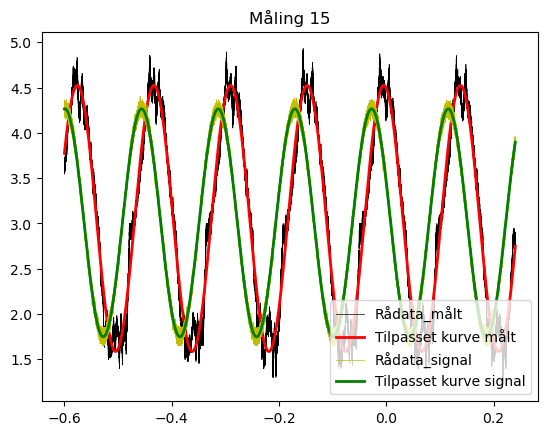

Amplitude=1.1944687476923055, Vinkelfrekvens=18.848326120497333, Frekvens=2.9998042710852375, Fase=2.1216394913006593, offset=3.052796304961706, Maks. Cov.=2.395976352213073e-06
Amplitude=-1.2592647328786106, Vinkelfrekvens=18.848487141055774, Frekvens=2.999829898303053, Fase=-0.2830041589468785, offset=3.0089631450595586, Maks. Cov.=2.3055620535152944e-07


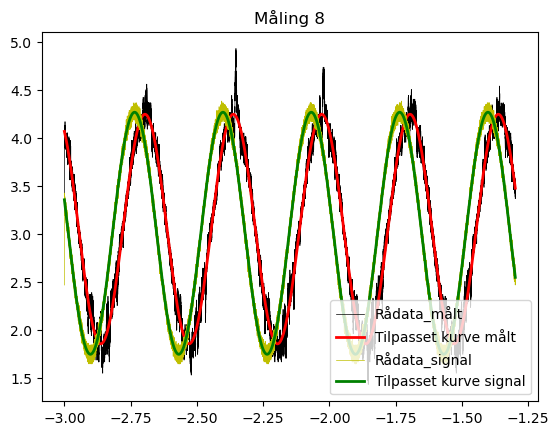

Amplitude=-1.2589022189735377, Vinkelfrekvens=3.770240434995625, Frekvens=0.6000524018744915, Fase=-0.5398307807009397, offset=3.065484385271856, Maks. Cov.=5.074250096734438e-08
Amplitude=-1.2594577106725469, Vinkelfrekvens=3.769663816051422, Frekvens=0.5999606301192411, Fase=-0.34984090368996296, offset=3.013334259710287, Maks. Cov.=1.8357308578484654e-08


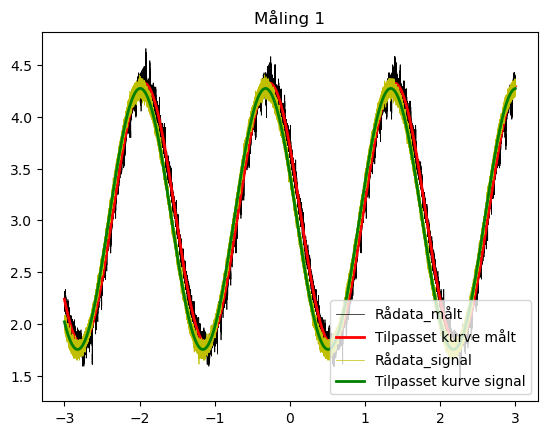

Amplitude=1.210778964924395, Vinkelfrekvens=12.5664022421037, Frekvens=2.0000050337118807, Fase=-2.502189778645936, offset=3.0569241812022754, Maks. Cov.=6.374896589884933e-07
Amplitude=1.2584445922677325, Vinkelfrekvens=12.565543263528122, Frekvens=1.9998683230255672, Fase=-1.9449425688420647, offset=3.008223358638034, Maks. Cov.=9.701773119680226e-08


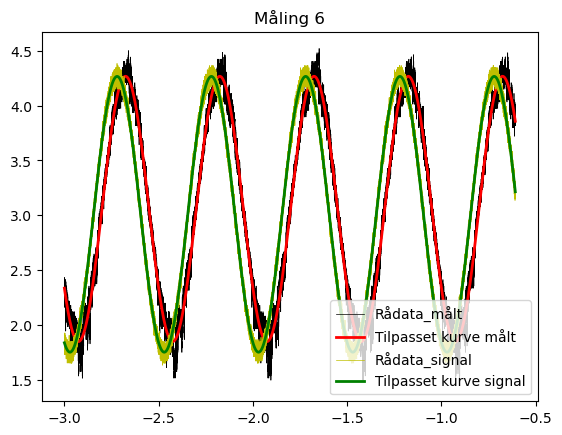

Amplitude=-1.1989801498863395, Vinkelfrekvens=15.707505246891435, Frekvens=2.4999271036846538, Fase=1.278364556370299, offset=3.0523338456600912, Maks. Cov.=1.6762917882961818e-06
Amplitude=-1.258970413054968, Vinkelfrekvens=15.708085717323954, Frekvens=2.500019488423308, Fase=1.936167038708706, offset=3.0096219206481516, Maks. Cov.=2.242747208147683e-07


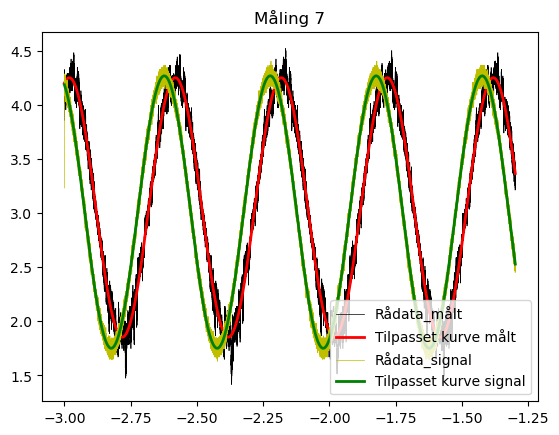

Amplitude=-1.1975260829544905, Vinkelfrekvens=21.99661798740804, Frekvens=3.500870484000088, Fase=0.8585868723443917, offset=3.060151989202549, Maks. Cov.=4.656670273642024e-06
Amplitude=1.2586637110027006, Vinkelfrekvens=21.990914901864905, Frekvens=3.499962809745022, Fase=-1.4943232102080517, offset=3.0025873269446413, Maks. Cov.=4.06317633463359e-07


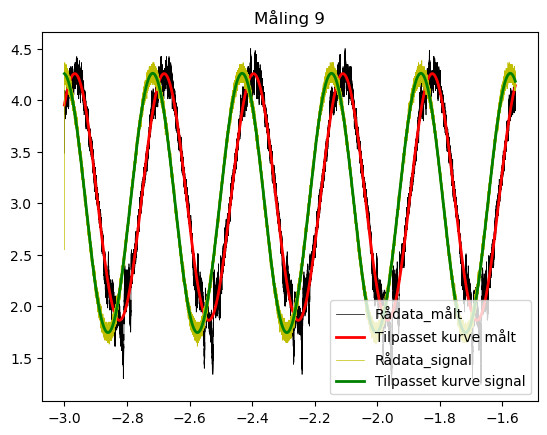

In [86]:
import matplotlib.pyplot as plt

def main():
    bode_data_list = []

    for data in yield_data_arrays():

        measurement_t, measurement_s, ref_measurement_t, ref_measurement_s, measurement_number = data
        
        fitted_sin = fit_sin(measurement_t, measurement_s, measurement_number)
        print(f"Amplitude={fitted_sin['amp']}, Vinkelfrekvens={fitted_sin['omega']}, Frekvens={fitted_sin['freq']}, Fase={fitted_sin['phase']}, offset={fitted_sin['offset']}, Maks. Cov.={fitted_sin['maxcov']}")

        ref_sin = fit_sin(ref_measurement_t, ref_measurement_s, measurement_number)
        print(f"Amplitude={ref_sin['amp']}, Vinkelfrekvens={ref_sin['omega']}, Frekvens={ref_sin['freq']}, Fase={ref_sin['phase']}, offset={ref_sin['offset']}, Maks. Cov.={ref_sin['maxcov']}")

        bode_data_list.append((measurement_number, fitted_sin['freq'], ref_sin['freq'], fitted_sin['amp'], ref_sin['amp']))

        plt.plot(measurement_t, measurement_s, "-k", label="Rådata_målt", linewidth=0.5)
        plt.plot(measurement_t, fitted_sin["fitfunc"](measurement_t), "r-", label="Tilpasset kurve målt", linewidth=2)

        plt.plot(ref_measurement_t, ref_measurement_s, "-y", label="Rådata_signal", linewidth=0.5)
        plt.plot(ref_measurement_t, ref_sin["fitfunc"](ref_measurement_t), "g-", label="Tilpasset kurve signal", linewidth=2)

        plt.legend(loc="lower right")
        plt.title(f"Måling {measurement_number}")
        plt.savefig(f"PLOT/plot_{measurement_number}.png")  # Lagrer plot som PNG
        plt.show() 
        

        
if __name__ == "__main__":
    main()